<h1 align='center' style='color:red'>Optimalan broj klastera dostave u gradu Čakovcu: hipotetski primjer</h1>

<h4 style='color:magenta'>Unos paketa</h4>

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd

<h4 style='color:magenta'>Postavljanje podataka</h4>

In [22]:
df = pd.read_excel("Lokacije.xlsx")
df.head()

,L1,L2,Napomene
0,16.429751,46.382521,NaN
1,16.440684,46.381251,NaN
2,16.429249,46.392455,NaN
3,16.410486,46.382242,NaN
4,16.446474,46.386556,NaN


In [23]:
df.drop(columns = 'Napomene', inplace = True)
df.head()

,L1,L2
0,16.429751,46.382521
1,16.440684,46.381251
2,16.429249,46.392455
3,16.410486,46.382242
4,16.446474,46.386556


In [24]:
scaler = MinMaxScaler()

scaler.fit(df[['L2']])
df['L2'] = scaler.transform(df[['L2']])

scaler.fit(df[['L1']])
df['L1'] = scaler.transform(df[['L1']])

In [25]:
df.head()

,L1,L2
0,0.488030,0.235691
1,0.764991,0.166064
2,0.475313,0.780318
3,0.000000,0.220395
4,0.911666,0.456908


<h4 style='color:magenta'>Inicijalni vizualni prikaz podataka</h4>

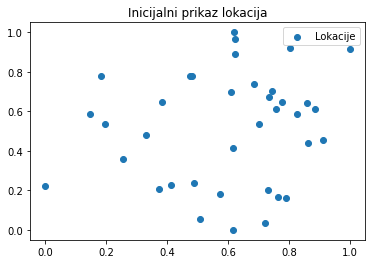

In [26]:
plt.scatter(df.L1, df.L2, label = 'Lokacije')
plt.title('Inicijalni prikaz lokacija')
plt.legend()

<h4 style='color:magenta'>2 klastera</h4>

In [27]:
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df[['L1', 'L2']])
y_predicted

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['Klaster'] = y_predicted
df.head()

,L1,L2,Klaster
0,0.488030,0.235691,0
1,0.764991,0.166064,0
2,0.475313,0.780318,1
3,0.000000,0.220395,0
4,0.911666,0.456908,1


In [29]:
km.cluster_centers_

array([[0.47043699, 0.25395765],
       [0.6929642 , 0.71524384]])

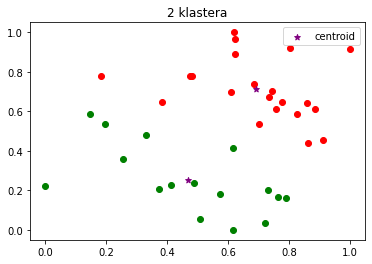

In [30]:
df1 = df[df.Klaster == 0]
df2 = df[df.Klaster == 1]
plt.scatter(df1.L1,df1.L2,color = 'green')
plt.scatter(df2.L1,df2.L2,color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.title('2 klastera')
plt.legend()

<h4 style='color:magenta'>3 klastera</h4>

In [31]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['L1', 'L2']])
y_predicted

array([1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0,
       1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [32]:
df['Klaster'] = y_predicted
df.head()

,L1,L2,Klaster
0,0.488030,0.235691,1
1,0.764991,0.166064,1
2,0.475313,0.780318,0
3,0.000000,0.220395,2
4,0.911666,0.456908,0


In [33]:
km.cluster_centers_

array([[0.73616213, 0.71537685],
       [0.59981346, 0.17120714],
       [0.21345879, 0.5154292 ]])

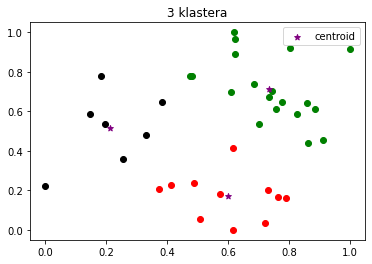

In [34]:
df1 = df[df.Klaster == 0]
df2 = df[df.Klaster == 1]
df3 = df[df.Klaster == 2]
plt.scatter(df1.L1,df1.L2,color = 'green')
plt.scatter(df2.L1,df2.L2,color = 'red')
plt.scatter(df3.L1,df3.L2,color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.title('3 klastera')
plt.legend()

<h4 style='color:magenta'>4 klastera</h4>

In [35]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(df[['L1', 'L2']])
y_predicted

array([0, 0, 1, 2, 3, 3, 3, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 3, 3, 3,
       0, 2, 3, 0, 0, 1, 1, 2, 3, 1, 3, 3, 1, 1, 3])

In [36]:
df['Klaster'] = y_predicted
df.head()

,L1,L2,Klaster
0,0.488030,0.235691,0
1,0.764991,0.166064,0
2,0.475313,0.780318,1
3,0.000000,0.220395,2
4,0.911666,0.456908,3


In [37]:
km.cluster_centers_

array([[0.59981346, 0.17120714],
       [0.61528499, 0.84631305],
       [0.21345879, 0.5154292 ],
       [0.82407277, 0.62015052]])

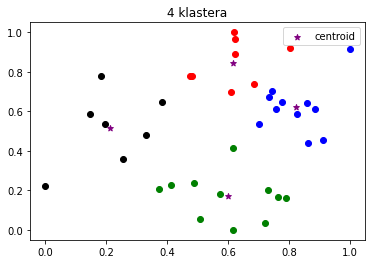

In [38]:
df1 = df[df.Klaster == 0]
df2 = df[df.Klaster == 1]
df3 = df[df.Klaster == 2]
df4 = df[df.Klaster == 3]
plt.scatter(df1.L1,df1.L2,color = 'green')
plt.scatter(df2.L1,df2.L2,color = 'red')
plt.scatter(df3.L1,df3.L2,color = 'black')
plt.scatter(df4.L1,df4.L2,color = 'blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')
plt.title('4 klastera')
plt.legend()

<h4 style='color:magenta'>Odabir broja klastera</h4>

In [39]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['L1', 'L2']])
    sse.append(km.inertia_)

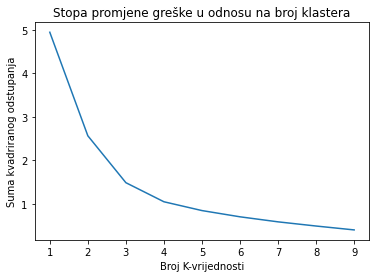

In [40]:
plt.xlabel('Broj K-vrijednosti')
plt.ylabel('Suma kvadriranog odstupanja')
plt.title('Stopa promjene greške u odnosu na broj klastera')
plt.plot(k_rng, sse)